#### Importing Libraries and Defining Preprocessing Parameters.

In [1]:
import torch 
from torchvision import transforms, models, datasets
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
from torch.utils.data import DataLoader

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/areeb/anaconda3/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#### Unzipping Dataset and Preprocessing it.

In [4]:
# !unzip ../kagglecatsanddogs_5340.zip 

In [5]:
# !mkdir cats_and_dogs
# !mkdir cats_and_dogs/train
# !mkdir cats_and_dogs/val

In [6]:
# !mkdir cats_and_dogs/train/Cat
# !mkdir cats_and_dogs/train/Dog
# !mkdir cats_and_dogs/val/Cat
# !mkdir cats_and_dogs/val/Dog

In [7]:
import os 
print(len(os.listdir(r"PetImages/Cat/")), len(os.listdir(r"PetImages/Dog/")))

12501 12501


In [8]:

round(.25 * len(os.listdir(r"PetImages/Cat/")))

3125

##### Adding the Training Dataset.

In [9]:
# for i in range(len(os.listdir(r"PetImages/Cat/"))):
#     if i < 500:
#         !cp "PetImages/Cat/{i}.jpg" "cats_and_dogs/train/Cat/"

In [10]:
# for i in range(len(os.listdir(r"PetImages/Dog/"))):
#     if i < 500:
#         !cp "PetImages/Dog/{i}.jpg" "cats_and_dogs/train/Dog/"

##### Adding the Validation Dataset.

In [11]:
# for i in range(len(os.listdir(r"PetImages/Cat/"))):
#     if i >= 500 & i < 600:
#         !cp "PetImages/Cat/{i}.jpg" "cats_and_dogs/val/Cat/"

# for i in range(500, 600):
#     !cp "PetImages/Cat/{i}.jpg" "cats_and_dogs/val/Cat/"

In [12]:
# for i in range(len(os.listdir(r"PetImages/Dog/"))):
#     if i >= 500 & i < 600:
#         !cp "PetImages/Dog/{i}.jpg" "cats_and_dogs/val/Dog/"

# for i in range(500, 600):
#     !cp "PetImages/Dog/{i}.jpg" "cats_and_dogs/val/Dog/"

In [13]:
training_dataset = datasets.ImageFolder(r'cats_and_dogs/train', transform=train_transform)
val_dataset = datasets.ImageFolder(r'cats_and_dogs/val', transform=val_transform)

training_loader = DataLoader(training_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)

In [14]:
def im_convert(ten):
    image =ten.clone().detach().numpy()
    image = image.transpose(1,2,0)# Original (color, width, height) new (width, height, color)
    print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5,0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [15]:
classes = ('Cat', 'Dog')
len(classes)

2

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


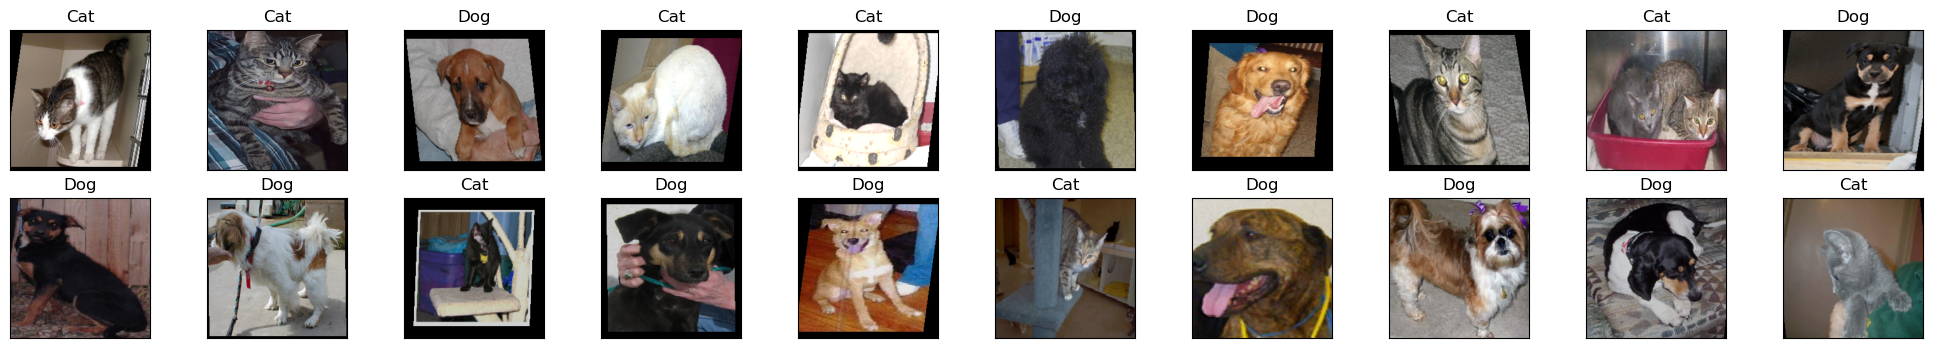

In [16]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))
for index in np.arange(20):
    axis = fig.add_subplot(2, 10, index+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[index]), cmap='gray')
    axis.set_title(classes [labels[index].item()])

#### Model Creation.

In [17]:
model = models.vgg16(pretrained=True)

/home/areeb/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/areeb/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [19]:
for param in model.parameters():
    param.requires_grad = False

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.to(device)
model.classifier[6] = last_layer

In [20]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

#### Testing and Validation.

In [22]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    # print("Outputs:",outputs.size(), "Labels:",labels.size())
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in val_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(val_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0221, acc 0.8050 
validation loss: 0.0124, validation acc 0.9200 
epoch : 2
training loss: 0.0096, acc 0.9410 
validation loss: 0.0088, validation acc 0.9450 
epoch : 3
training loss: 0.0069, acc 0.9610 
validation loss: 0.0075, validation acc 0.9500 


KeyboardInterrupt: 

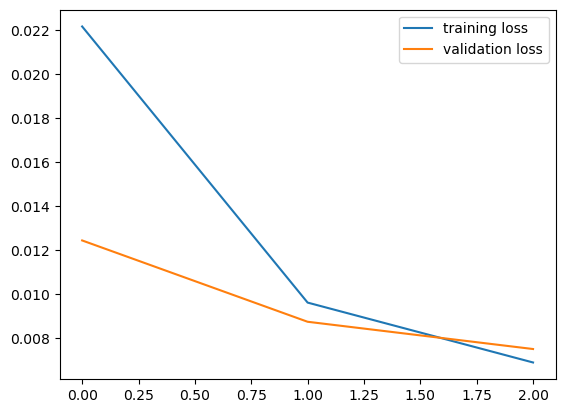

In [23]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

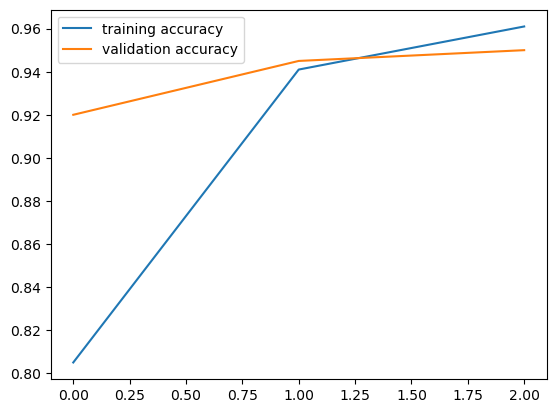

In [24]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

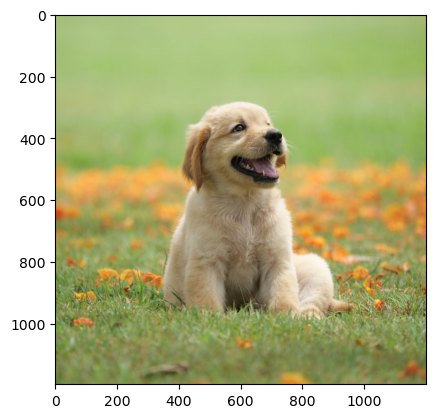

In [25]:
import requests
from PIL import Image

url = test_dog_image = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

(224, 224, 3)


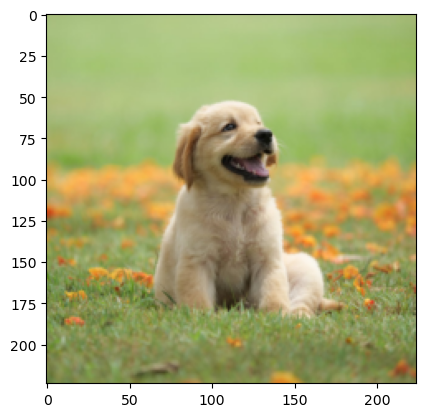

In [26]:
img = val_transform(img) 
plt.imshow(im_convert(img))

In [27]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

Dog


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


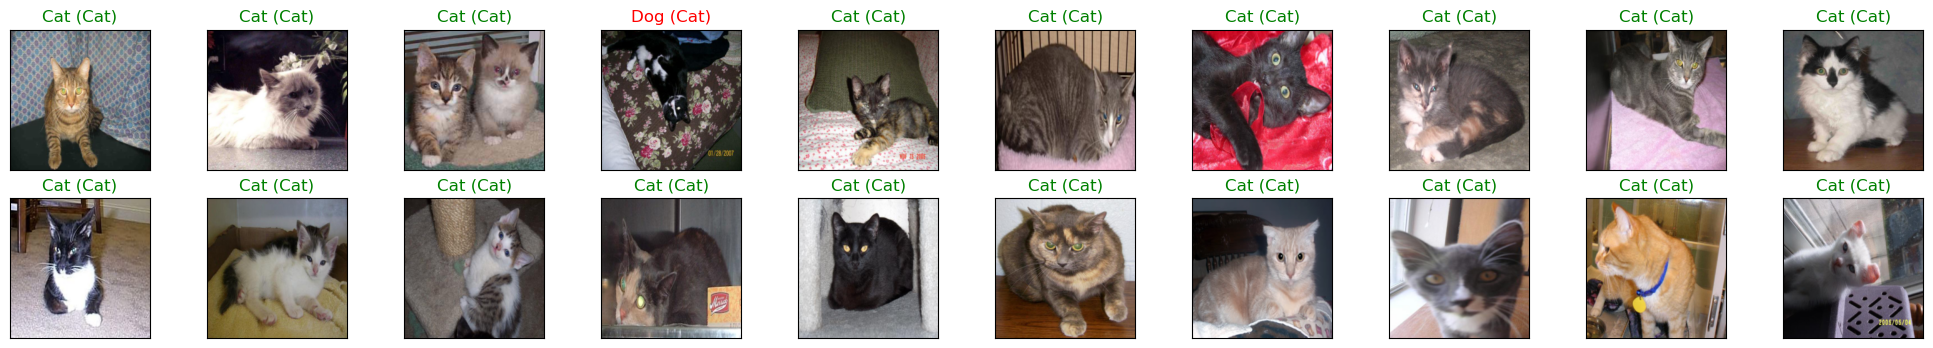

In [28]:
dataiter = iter(val_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))